# Model Verification
This notebook performs verification checks listed in the [Agent-based modelling of sociotechnical systems](https://books.google.nl/books?hl=en&lr=&id=rpLBkl-1_7QC&oi=fnd&pg=PR3&dq=agent+based+modelling+of+socio+technical+systems&ots=mSs1UCSXhV&sig=WddXV7v5whTuLU27FUYvuEdxGMM) and reports the results.

In [1]:
from evidence_files.methods import *
from model.cepai_model import *

Following lever and uncertainty values are used for the model verification

In [2]:
levers = {
    "L1": 0.0,  # Minimal requirement for reused parts
    "L2": 0.0,  # Minimal requirement for high-quality plastic
    "L3": 0.0,  # Use better solvable cohesives
    "L4": 1.0,  # Include externality for virgin plastic
    "L5": 0.05  # Minimal requirement for recyclate, set to 5% as per model calibration.
}

uncertainties = {
    "X1": 0.0,  # Annual increase factor of oil price
    "X2": 0.0,  # Annual probability for global oil shock
    "X3": 0.0  # Annual increase of recycling efficiency
}

## 1. Recording and tracking agent behaviour

This verification check was integrated in the model implementation stage.
During encoding the agents, each behaviour was tracked and verified.
As the model is encoded in python, text prompts and value outputs were used for tracking.
These trackers were removed after successful encoding and verification of agent behaviour.

## 2. Single-agent testing

The single agent check is not suitable for this case as all agents are interdependent for model initialisation.
Therefore, a minimal model was initialized and key output matrices  were observed.

In [3]:
agent_counts = {
    PartsManufacturer: 1,
    Refiner: 1,
    Recycler: 1,
    CarManufacturer: 1,
    User: 10,
    Garage: 1,
    Dismantler: 1
}

In [4]:
model = CEPAIModel(agent_counts=agent_counts, levers=levers, uncertainties=uncertainties)

In [5]:
results = model.run(steps=5, time_tracking=True)

Run time: 0.13 seconds
Simulation completed!


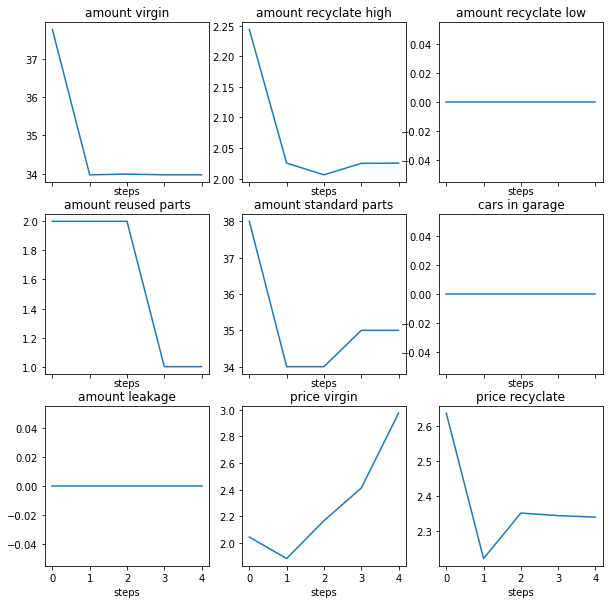

In [6]:
plot_results(results)

In [7]:
for agent in model.all_agents[Garage]:
    stock = get_stocks(agent)
    print(stock)

{<Component.VIRGIN: 1>: 0.0, <Component.RECYCLATE_LOW: 2>: 0.0, <Component.RECYCLATE_HIGH: 3>: 0.0, <Component.PARTS_FOR_RECYCLER: 5>: 1, <Component.PARTS: 4>: 70, <Component.CARS: 6>: 0, <Component.CARS_FOR_RECYCLER: 7>: 1, <Component.CARS_FOR_DISMANTLER: 8>: 0}


In [8]:
for agent in model.all_agents[User]:
    print(agent)
    stock = get_stocks(agent)
    print(stock)
    break

{<Component.VIRGIN: 1>: 0.0, <Component.RECYCLATE_LOW: 2>: 0.0, <Component.RECYCLATE_HIGH: 3>: 0.0, <Component.PARTS_FOR_RECYCLER: 5>: 0, <Component.PARTS: 4>: 0, <Component.CARS: 6>: 0, <Component.CARS_FOR_RECYCLER: 7>: 0, <Component.CARS_FOR_DISMANTLER: 8>: 0}


In addition to this, the end stock of Garage and Users are checked.
Garage and User are the most interactive agents in the model.
Therefore, change in the stocks indicates that these agents are interacting and transferring the materials to other agents.

## 3. Interaction testing in a minimal model

Agent interaction is verified by checking the exchange of materials between the agents.
This was verified by evaluating the material flow in the model.

In [9]:
agent_counts = {
    PartsManufacturer: 1,
    Refiner: 1,
    Recycler: 1,
    CarManufacturer: 1,
    User: 25,
    Garage: 1,
    Dismantler: 1
}

In [12]:
model = CEPAIModel(agent_counts=agent_counts, levers=levers, uncertainties=uncertainties)

In [13]:
results = model.run(steps=50, time_tracking=True, )

Run time: 2.7 seconds
Simulation completed!


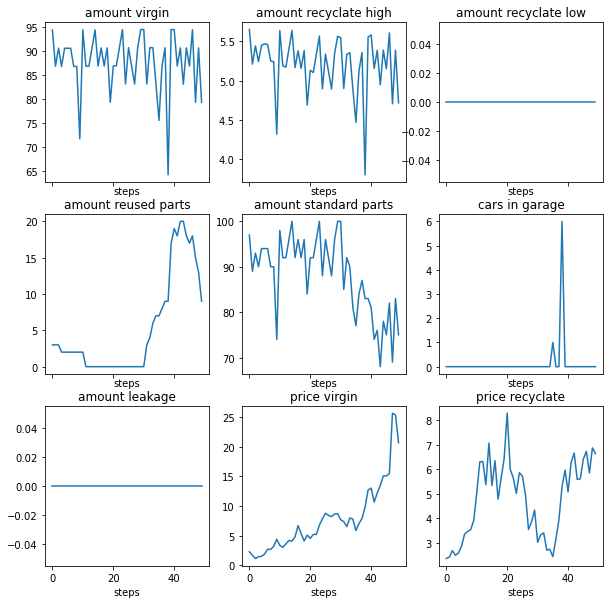

In [14]:
plot_results(results)

As the results indicate above, agents are interacting in the minimal model.
The parts are being reused, agents interaction is causing price variation.
Amount of standard parts are reducing with increase in the number of reused parts.
Note: This plot is created for VERIFICATION purposes only. This should not be used for deducing the model behaviour as the model is not calibrated.

## 4. Multi-agent testing

After performing aforementioned verification tests, multi-agent testing was preformed by initialising the model with all the agents.
The model was executed to perform a 50 steps run and outcomes were compared with the conceptualised behaviour.

In [15]:
agent_counts = {
    PartsManufacturer: 3,
    Refiner: 3,
    Recycler: 1,
    CarManufacturer: 4,
    User: 250,
    Garage: 1,
    Dismantler: 1
}

In [16]:
model = CEPAIModel(agent_counts=agent_counts, levers=levers, uncertainties=uncertainties)

In [17]:
results = model.run(steps=50, time_tracking=True)

Run time: 10.6 seconds
Simulation completed!


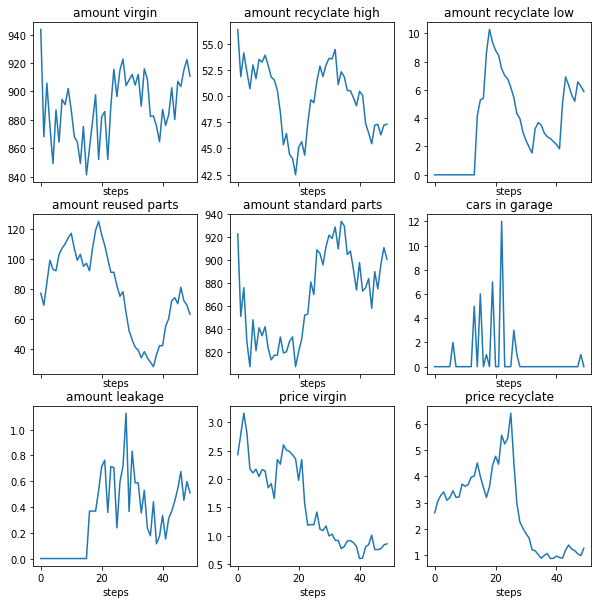

In [18]:
plot_results(results)

The above figure showcases that all the model matrices are changing in accordance to the model conceptualisation.
The amount of both virgin and recyclate plastic is varying based on the volumes in the previous rounds.
The standard and reused parts in the model are also following the conceptualised behaviour.
Lastly, car is breaking down, going to garage and garage is processing the car and forwarding the material forward in the chain.

Note: This plot is created for VERIFICATION purposes only. This should not be used for deducing the model behaviour as the model is not calibrated.